# 1. Building Complex Models Using the Functional API

- Let's create an linear regressor to predict the price of house using a complex regression model using Functonal API.

- Here we will use popular 'california_housing' dataset to train our neural network.

In [48]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense

## Dataset

- The california_housing dataset contains 20640 instances with 8 features and 'target' as a lebel.
- we will split in into train, test and validation sets as we will bw using "sgd" as an optimizer.


In [49]:
dataset = fetch_california_housing()

## splitting dataset into Train, Test and Validation set.

In [50]:
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=32)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=32)

In [51]:
[x_train.shape, y_train.shape], [x_test.shape, y_test.shape], [x_val.shape, y_val.shape]

([(11610, 8), (11610,)], [(5160, 8), (5160,)], [(3870, 8), (3870,)])

### Let's scale the dataset

In [52]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)
x_val = scale.fit_transform(x_val)

## Building a Dense model

-  In case of linear regreession, we only have a single neuron as an output layer, because here we are predicting the price of each instance as output.

- In this model we will send part of our training data through the full stack of deep layers and part of it directly to output layer.

In [53]:
# Creating 2 separeaate input layers for different parts of a deep neural network
input1 = Input(shape=[5], name='deep input')
input2 = Input(shape=[6], name='direct input')

# Creating first hidden layer stacked on with second input layer
hidden1 = Dense(units=30, activation='relu')(input2)

# Creating second hidden layer to on top of first dense layer
hidden2 = Dense(units=30, activation="relu")(hidden1)

# connecting second input layer directly to first hidden layer
concat = keras.layers.concatenate([input1, hidden2], axis=1)
""" 
Now 'concat' has became a network which contains the deep network and input2 layer directly connected to it.

""" 

# Creating output layer with 1 neuron and connecting it with concat layer
output = Dense(1, name="output_layer")(concat)

## Creating a model using dense neural network created above 

In [54]:
from keras.models import Model
model = Model(inputs=[input1, input2], outputs=[output])   # 
model

## Compiling the model 
- Here we will use "mean-squared-error" as loss function and "Stochastic Gradient Descent" as an optimizer with learning rate : <br/> (1e-3) =   1 * (10 ^ (-3)) = 0.001

In [55]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

### Splitting the train, test and validation sets into input1 and input2

In [56]:
x_train1, x_train2 = x_train[:, :5], x_train[:, 2:]
x_val1, x_val2 = x_val[:, :5], x_val[:, 2:]
x_test1, x_test2 = x_test[:, :5], x_test[:, 2:]

## Let's fit the model to our dataset

In [57]:
Train = model.fit((x_train1, x_train2), y_train, epochs=30, validation_data=((x_val1, x_val2), y_val))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 2.9622 - val_loss: 0.8161
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7218 - val_loss: 0.6457
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6408 - val_loss: 0.5747
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5618 - val_loss: 0.5375
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5538 - val_loss: 0.5111
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5182 - val_loss: 0.4899
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5140 - val_loss: 0.4758
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4979 - val_loss: 0.4652
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4683 - val_loss: 0.4548
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4632 - val_loss: 0.4484

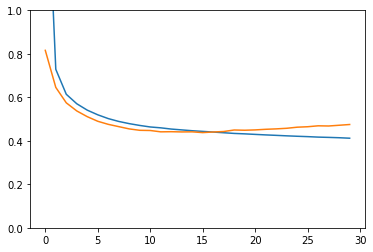

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(pd.DataFrame(Train.history))
plt.gca().set_ylim(0, 1)
plt.show()

### Evaluating the model and Making Predictions 

In [59]:
Test = model.evaluate((x_test1, x_test2), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4640


In [60]:
model.predict((x_test1[:15], x_test2[:15]))

array([[0.48807907],
       [1.8051984 ],
       [2.5637584 ],
       [4.6409645 ],
       [1.0222323 ],
       [1.6426119 ],
       [1.7118404 ],
       [1.8668276 ],
       [1.3908737 ],
       [1.8593147 ],
       [1.2851903 ],
       [1.9173831 ],
       [3.013431  ],
       [2.7171884 ],
       [2.1441197 ]], dtype=float32)

# 2. Building Same Dynamic Model Using the Subclassing API

- In subclassing API we can subclass the Model class, create the layers we need in the constructor and then we can use them for any computation just by calling that method.

- Then we can compile it, evaluate it and use it to make predictions, exactly like we just did.

In [61]:
class Subclassing_api(keras.models.Model):

    # Creating a constructor with important arguments 
    def __init__(self, units=30, Activation='relu', **kwargs):
        # let's define another constructor
        super().__init__(**kwargs)    # handles standard kwargs (e.g,  layer_name)
        self.dense1 = Dense(units=units, activation=Activation)
        self.dense2 = Dense(units=units, activation=Activation)
        self.output_layer = Dense(1)

    def Model(self, inputs):
        input1, input2 = inputs
        dense1 = self.dense1(input2)
        dense2 = self.dense2(dense1)
        concat = keras.layers.concatenate([input1, hidden2], axis=1)
        output = self.output_layer(concat)

Model = Subclassing_api()

- we do not need to create the **inputs**, we just use the input argument to the **call()** method, and we separate the creation of the layers15 in the constructor from their usage in the **call()** method.

-  we can do pretty much anything we want in the
call()  method:  for  loops,  if  statements,  low-level  TensorFlow  operations, etc.  This  makes  it  a  great  API  for  researchers
experimenting with new ideas

## Saving the model

- Keras  will  save  both  the  model’s  architecture  (including  every  layer’s  hyperparame‐
ters)  and  the  value  of  all  the  model  parameters  for  every  layer  (e.g.,  connection
weights and biases), using the HDF5 format. It also saves the optimizer (including its
hyperparameters and any state it may have)

In [62]:

model.save("california_housing_prediction.h5")


# 3. Model with Early Stopping and callbacks

- callbacks argument lets us specify a list of objects
that Keras will call during training at the start and end of training, at the start and end of each epoch and even before and after processing each batch.

- ModelCheckpoint  callback  saves  checkpoints  of   model  at  regular  intervals  during training, by default at the end of each epoch

- we can set **save_best_only=True**  when  creating  the  ModelCheckpoint.  In  this  case,  it  will  only
save  your  model  when  its  performance  on  the  validation  set  is  the  best  so  far.

In [ ]:
## first create and compile model as we done before then follow following steps

keras.models.load_model("california_housing_prediction.h5")
callbacks_cb = keras.callbacks.ModelCheckpoint("california_housing_prediction.h5", save_best_only=True)

Training = model.fit((x_train1, x_train2), y_train, 
                               epochs=30, 
                               validation_data=((x_val1, x_val2), y_val), 
                               callbacks=callbacks_cb
                               
)